In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# 1. Load the dataset
data = pd.read_csv('df1_loan.csv')

In [ ]:
# 2. Preprocessing: Inspect the data
print("Initial Data Info:")
print(data.info())
print("\nMissing Values Before Preprocessing:")
print(data.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ 

In [ ]:
# 3. Preprocessing: Handle missing values
# Numerical columns: Fill with median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
# Categorical columns: Fill with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Property_Area'] = data['Property_Area'].fillna(data['Property_Area'].mode()[0])


In [ ]:
# 4. Preprocessing: Clean Total_Income
data['Total_Income'] = data['Total_Income'].str.replace('$', '', regex=False).astype(float)

In [ ]:
# 5. Preprocessing: Encode categorical variables
label = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    data[col] = label.fit_transform(data[col])

In [ ]:
# 6. Preprocessing: Drop unnecessary columns
data = data.drop(['Loan_ID', 'Unnamed: 0'], axis=1, errors='ignore')

In [ ]:
# 7. Preprocessing: Verify data after preprocessing
print("\nData Info After Preprocessing:")
print(data.info())
print("\nMissing Values After Preprocessing:")
print(data.isnull().sum())
print("\nFirst 5 Rows of Preprocessed Data:")
print(data.head())


Data Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             500 non-null    int64  
 1   Married            500 non-null    int64  
 2   Dependents         500 non-null    int64  
 3   Education          500 non-null    int64  
 4   Self_Employed      500 non-null    int64  
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Loan_Amount_Term   500 non-null    float64
 9   Credit_History     500 non-null    float64
 10  Property_Area      500 non-null    int64  
 11  Loan_Status        500 non-null    int64  
 12  Total_Income       500 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 50.9 KB
None

Missing Values After Preprocessing:
Gender               0
Married              0
Depe

In [ ]:
# 8. Analyze Loan Approval Counts
approval_counts = data['Loan_Status'].value_counts()
approval_percentage = (approval_counts / len(data)) * 100
print("\nLoan Approval Counts:")
print(approval_counts)
print("\nLoan Approval Percentages:")
print(f"Approved (1): {approval_percentage[1]:.2f}%")
print(f"Not Approved (0): {approval_percentage[0]:.2f}%")


Loan Approval Counts:
Loan_Status
1    345
0    155
Name: count, dtype: int64

Loan Approval Percentages:
Approved (1): 69.00%
Not Approved (0): 31.00%


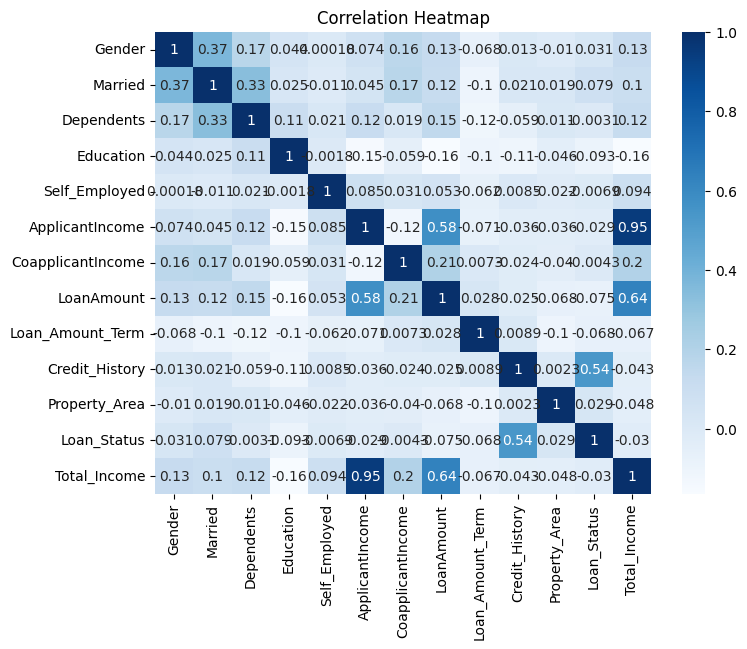

In [ ]:
# 9. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 10. Split features and target
X = data.drop('Loan_Status', axis=1)  # Features
y = data['Loan_Status']  # Target

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 11. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# 12. Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [ ]:
# Dictionary to store evaluation results
results = {}

In [ ]:
# 13. Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Print confusion matrix
    print(f"\nConfusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))



Confusion Matrix for Logistic Regression:
[[16 15]
 [ 1 68]]

Confusion Matrix for Decision Tree:
[[19 12]
 [ 9 60]]

Confusion Matrix for Random Forest:
[[19 12]
 [ 1 68]]


In [ ]:
# 14. Display evaluation results
print("\nModel Evaluation Results:")
results_df = pd.DataFrame(results).T
print(results_df)


Model Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression      0.84   0.819277  0.985507  0.894737  0.750818
Decision Tree            0.79   0.833333  0.869565  0.851064  0.741234
Random Forest            0.87   0.850000  0.985507  0.912752  0.799205


In [ ]:
# 15. Determine the best model
best_model = results_df.idxmax()['Accuracy']  # Model with highest accuracy
best_metric = results_df.max()['Accuracy']   # Highest accuracy value
print(f"\nBest Model: {best_model} with Accuracy: {best_metric:.4f}")



Best Model: Random Forest with Accuracy: 0.8700



Feature Importance (Random Forest):
              Feature  Importance
9      Credit_History    0.214337
11       Total_Income    0.164059
7          LoanAmount    0.161106
5     ApplicantIncome    0.159846
6   CoapplicantIncome    0.085279
2          Dependents    0.051802
10      Property_Area    0.048383
8    Loan_Amount_Term    0.036820
1             Married    0.023033
3           Education    0.021660
0              Gender    0.017498
4       Self_Employed    0.016176


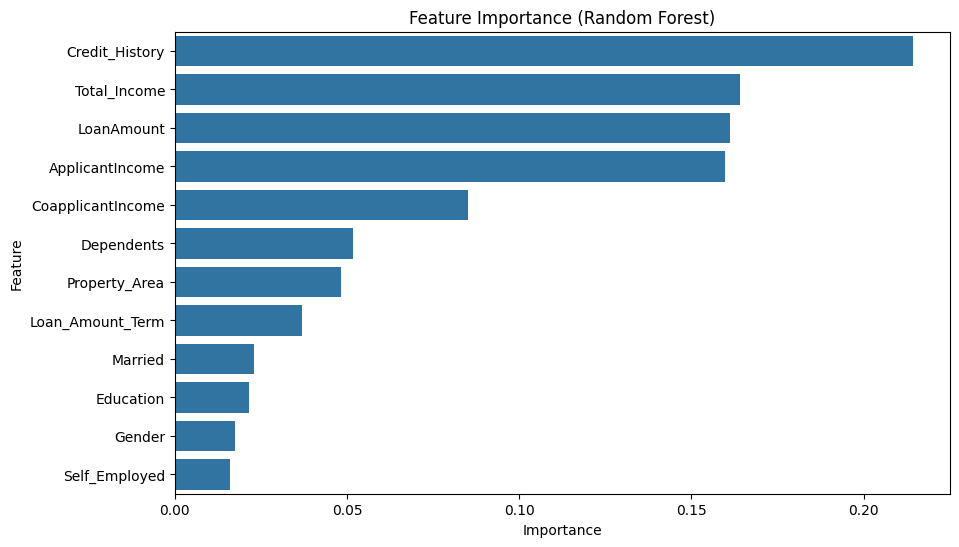

In [ ]:
# 16. Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

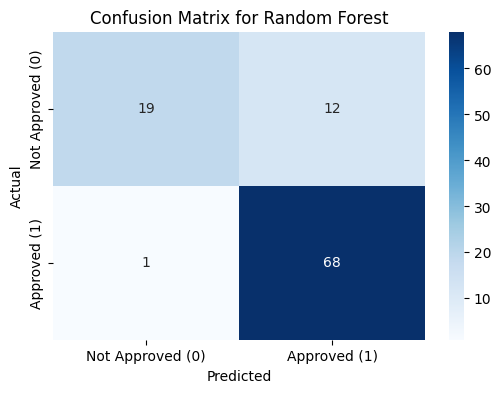

Confusion Matrix:
[[19 12]
 [ 1 68]]

True Negatives (Not Approved, Predicted Correctly): 19
False Positives (Not Approved, Predicted Approved): 12
False Negatives (Approved, Predicted Not Approved): 1
True Positives (Approved, Predicted Correctly): 68


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# confusion matrix values
print("Confusion Matrix:")
print(cm)
print("\nTrue Negatives (Not Approved, Predicted Correctly):", cm[0, 0])
print("False Positives (Not Approved, Predicted Approved):", cm[0, 1])
print("False Negatives (Approved, Predicted Not Approved):", cm[1, 0])
print("True Positives (Approved, Predicted Correctly):", cm[1, 1])

In [ ]:
# 17. Summary
print("\nSummary:")
print(f"Number of Approved Loans: {approval_counts[1]} ({approval_percentage[1]:.2f}%)")
print(f"Number of Not Approved Loans: {approval_counts[0]} ({approval_percentage[0]:.2f}%)")
print(f"Key Feature for Approval: {feature_importance.iloc[0]['Feature']} (Importance: {feature_importance.iloc[0]['Importance']:.4f})")
print(f"Best Model: {best_model} with Accuracy: {best_metric:.4f}")


Summary:
Number of Approved Loans: 345 (69.00%)
Number of Not Approved Loans: 155 (31.00%)
Key Feature for Approval: Credit_History (Importance: 0.2143)
Best Model: Random Forest with Accuracy: 0.8700
